## Demo using the gymnasium environment for dynamic foraging


Install some helper plotting functions

In [3]:
!pip install aind-dynamic-foraging-basic-analysis --quiet

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np

from aind_dynamic_foraging_models.generative_model.gym_env.dynamic_bandit_env import DynamicBanditEnv
from aind_dynamic_foraging_models.generative_model.dynamic_foraging_tasks.coupled_block_task import CoupledBlockTask

from aind_dynamic_foraging_basic_analysis import plot_foraging_session

Define a random agent

In [4]:
class RandomAgent():
    def __init__(self, k_arms):
        self.k_arms = k_arms
        
    def act(self, state):
        return np.random.randint(0, self.k_arms)

Let the random agent perform the task

In [5]:
task = CoupledBlockTask(block_min=40, block_max=80, block_beta=20)
env = DynamicBanditEnv(task, num_trials=1000)
random_agent = RandomAgent(k_arms=env.action_space.n)

observation, info = env.reset()
done = False
actions = []
rewards = []

while not done:  # Trial loop
    # Choose an action
    action = random_agent.act(observation)
    
    # Take the action and observe the next observation and reward
    next_observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated        
    
    # Move to the next observation
    observation = next_observation
    
    actions.append(action)
    rewards.append(reward)

Plot the session

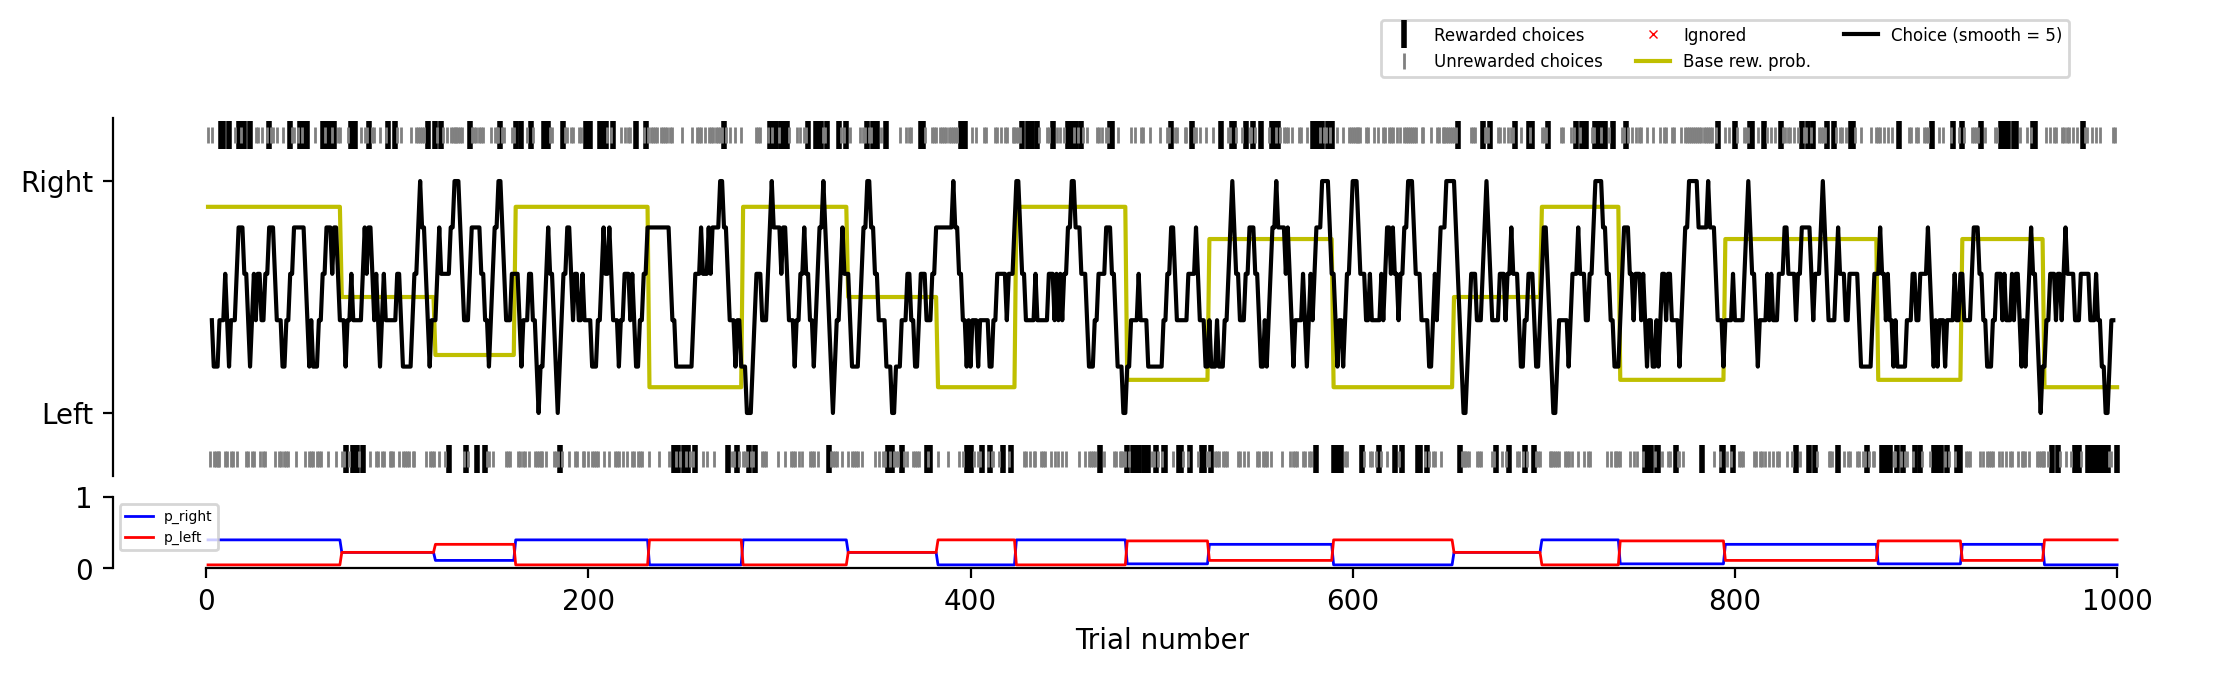

In [6]:
plot_foraging_session(choice_history=actions,
                            reward_history=rewards,
                            p_reward=np.array(env.task.trial_p_reward).T);